In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Load the dataset
data = pd.read_csv('Smart_health_dataset.csv')
print(data)

      Patient_ID  Day  Demographics Gender  Patient_Age        BMI  \
0         7981.0  1.0           1.0      F         54.0  18.045442   
1          740.0  2.0           1.0      F         54.0  18.045442   
2          741.0  3.0           1.0      F         54.0  18.045442   
3          742.0  4.0           1.0      F         54.0  18.045442   
4         1760.0  5.0           1.0      F         54.0  18.045442   
...          ...  ...           ...    ...          ...        ...   
9989         NaN  NaN           NaN    NaN          NaN        NaN   
9990         NaN  NaN           NaN    NaN          NaN        NaN   
9991         NaN  NaN           NaN    NaN          NaN        NaN   
9992         NaN  NaN           NaN    NaN          NaN        NaN   
9993         NaN  NaN           NaN    NaN          NaN        NaN   

      Blood Pressure (Systolic)  Blood Pressure (Diastolic)  \
0                         115.0                        85.0   
1                         121.0  

In [3]:
print(data.head)
print(data.tail)
print(data.describe)

<bound method NDFrame.head of       Patient_ID  Day  Demographics Gender  Patient_Age        BMI  \
0         7981.0  1.0           1.0      F         54.0  18.045442   
1          740.0  2.0           1.0      F         54.0  18.045442   
2          741.0  3.0           1.0      F         54.0  18.045442   
3          742.0  4.0           1.0      F         54.0  18.045442   
4         1760.0  5.0           1.0      F         54.0  18.045442   
...          ...  ...           ...    ...          ...        ...   
9989         NaN  NaN           NaN    NaN          NaN        NaN   
9990         NaN  NaN           NaN    NaN          NaN        NaN   
9991         NaN  NaN           NaN    NaN          NaN        NaN   
9992         NaN  NaN           NaN    NaN          NaN        NaN   
9993         NaN  NaN           NaN    NaN          NaN        NaN   

      Blood Pressure (Systolic)  Blood Pressure (Diastolic)  \
0                         115.0                        85.0   
1  

In [4]:
# Create target variable for classification (1 if next day's closing price is higher, 0 otherwise)
data['Target'] = (data['Patient_ID'].shift(-1) > data['Patient_ID']).astype(int)

In [5]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [6]:
# Gathering the Companies Strategies Information
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Patient_ID', 'Blood Pressure (Systolic)', 'Blood Pressure (Diastolic)', 'Pulse Rate']])
print(scaled_data)

[[ 1.03144853 -0.87499824  0.39019031 -1.09250006]
 [-1.36924658 -0.45016031 -0.05672179 -0.74414585]
 [-1.36891504 -0.59177296  0.03266063 -0.09098172]
 ...
 [-0.47076795 -1.93709308  0.03266063  0.69281523]
 [-0.47043641 -0.37935399  0.39019031  0.64927096]
 [-0.47010487 -1.51225514 -0.50363388  0.34446103]]


In [7]:
# Create features and target variable
X = scaled_data[:, :-1]
y = data['Target'].values

In [8]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(X_train)

[[-0.41772124 -0.59177296 -0.23548662]
 [ 0.58121459  0.96596613  0.92648482]
 [-1.36659425 -0.30854767 -0.50363388]
 ...
 [-0.70384193  1.24919142 -0.05672179]
 [ 0.55071273 -0.52096663 -0.23548662]
 [-1.1282156  -0.23774134 -0.5930163 ]]


In [11]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy}')

Decision Tree Accuracy: 0.7524271844660194


In [12]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.8398058252427184


In [13]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy}')

Logistic Regression Accuracy: 0.8689320388349514


In [14]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')

SVM Accuracy: 0.8689320388349514


In [15]:
# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print(knn_predictions)

[1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
# Neural Network using TensorFlow
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
nn_predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f'Neural Network Accuracy: {nn_accuracy}')

Epoch 1/20
26/26 [==============================] - 1s 11ms/step - loss: 0.6067 - accuracy: 0.8104 - val_loss: 0.5548 - val_accuracy: 0.8689
Epoch 2/20
26/26 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.8384 - val_loss: 0.4816 - val_accuracy: 0.8689
Epoch 3/20
26/26 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.8384 - val_loss: 0.4358 - val_accuracy: 0.8689
Epoch 4/20
26/26 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.8384 - val_loss: 0.4057 - val_accuracy: 0.8689
Epoch 5/20
26/26 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.8384 - val_loss: 0.3857 - val_accuracy: 0.8689
Epoch 6/20
26/26 [==============================] - 0s 4ms/step - loss: 0.3997 - accuracy: 0.8384 - val_loss: 0.3737 - val_accuracy: 0.8689
Epoch 7/20
26/26 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8384 - val_loss: 0.3642 - val_accuracy: 0.8689
Epoch 8/20
26/26 [=

In [17]:
# Deep Learning with Keras
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
dl_predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
dl_accuracy = accuracy_score(y_test, dl_predictions)
print(f'DL Accuracy: {dl_accuracy}')

Epoch 1/10
26/26 [==============================] - 1s 2ms/step - loss: 0.6155 - accuracy: 0.7193
Epoch 2/10
26/26 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.8384
Epoch 3/10
26/26 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8384
Epoch 4/10
26/26 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8384
Epoch 5/10
26/26 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8384
Epoch 6/10
26/26 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8384
Epoch 7/10
26/26 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8384
Epoch 8/10
26/26 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8384
Epoch 9/10
26/26 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8384
Epoch 10/10
7/7 [==============================] - 0s 2ms/step
DL Accuracy: 0.8689320388349514


In [18]:
# Evaluation
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("Deep Learning Accuracy:", accuracy_score(y_test, dl_predictions))
print(f'Decision Tree Accuracy: {dt_accuracy}')
print("DL Accuracy:", accuracy_score(y_test, dl_predictions))

Random Forest Classifier Accuracy: 0.8398058252427184
Logistic Regression Accuracy: 0.8689320388349514
SVM Accuracy: 0.8689320388349514
KNN Accuracy: 0.8106796116504854
Deep Learning Accuracy: 0.8689320388349514
Decision Tree Accuracy: 0.7524271844660194
DL Accuracy: 0.8689320388349514


In [19]:
# Confusion Matrix :
print("\nConfusion Matrix for #RandomForestClassifier:")
print(confusion_matrix(y_test, rf_predictions))


Confusion Matrix for #RandomForestClassifier:
[[  7  20]
 [ 13 166]]


In [20]:
# Confusion Matrix :
print("\nConfusion Matrix for #Logistic Regression :")
print(confusion_matrix(y_test, lr_predictions))


Confusion Matrix for #Logistic Regression :
[[  4  23]
 [  4 175]]


In [21]:
# Confusion Matrix :
print("\nConfusion Matrix for #Support Vector Machine:")
print(confusion_matrix(y_test, svm_predictions))


Confusion Matrix for #Support Vector Machine:
[[  0  27]
 [  0 179]]


In [22]:
# Confusion Matrix :
print("\nConfusion Matrix for #KNeighborsClassifier:")
print(confusion_matrix(y_test, knn_predictions))


Confusion Matrix for #KNeighborsClassifier:
[[  6  21]
 [ 18 161]]


In [23]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=54)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test)

[[-0.15831467 -0.24046231 -0.97046656]
 [-0.50952571  0.17570949 -0.70822808]
 [-1.61726788  1.21613899  1.1274413 ]
 ...
 [ 0.20683857 -0.72599608  0.34072585]
 [ 1.5735076  -0.79535804  0.42813868]
 [-1.01941243 -0.10173838  0.1659002 ]]


In [24]:
'''Implement and train SVM model'''
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8470873786407767


In [25]:
'''Implement and train CNN model'''

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train_cnn)
print(X_test_cnn)

[[[ 0.74062623]
  [-0.17110035]
  [ 0.25331302]]

 [[-1.06522256]
  [ 1.28550095]
  [ 0.69037716]]

 [[ 0.26327135]
  [ 1.49358685]
  [ 2.17639523]]

 ...

 [[-0.4580723 ]
  [-0.72599608]
  [-0.00892546]]

 [[-1.42606036]
  [-0.51791018]
  [ 0.1659002 ]]

 [[ 1.63823931]
  [ 0.86932915]
  [-0.00892546]]]
[[[-0.15831467]
  [-0.24046231]
  [-0.97046656]]

 [[-0.50952571]
  [ 0.17570949]
  [-0.70822808]]

 [[-1.61726788]
  [ 1.21613899]
  [ 1.1274413 ]]

 ...

 [[ 0.20683857]
  [-0.72599608]
  [ 0.34072585]]

 [[ 1.5735076 ]
  [-0.79535804]
  [ 0.42813868]]

 [[-1.01941243]
  [-0.10173838]
  [ 0.1659002 ]]]


In [26]:
# Step 6: Visualize the results
# Assuming you have predictions from both models
svm_predictions = svm_model.predict(X_test)
print(svm_predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


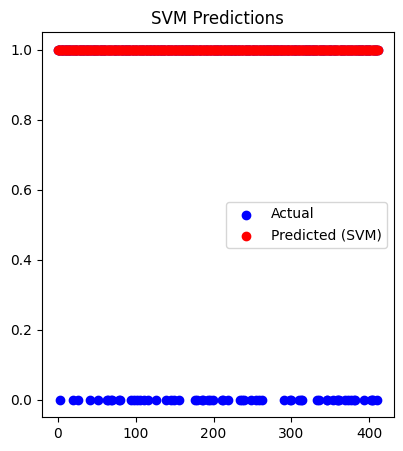

In [27]:
# Plotting SVM predictions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(svm_predictions)), svm_predictions, label='Predicted (SVM)', color='red')
plt.title('SVM Predictions')
plt.legend()

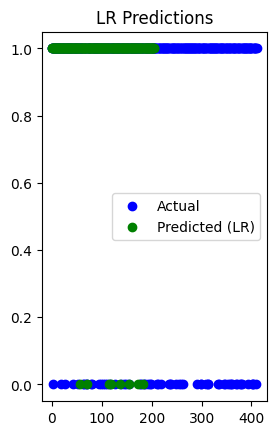

In [28]:
# Plotting LR predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(lr_predictions)), lr_predictions, label='Predicted (LR)', color='green')
plt.title('LR Predictions')
plt.legend()
plt.show()

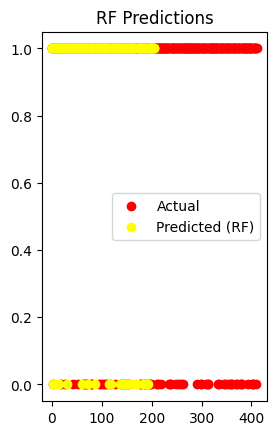

In [29]:
# Plotting RF predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='red')
plt.scatter(range(len(rf_predictions)), rf_predictions, label='Predicted (RF)', color='yellow')
plt.title('RF Predictions')
plt.legend()
plt.show()

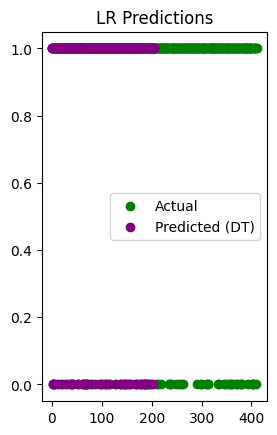

In [30]:
# Plotting DT predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='green')
plt.scatter(range(len(dt_predictions)), dt_predictions, label='Predicted (DT)', color='purple')
plt.title('LR Predictions')
plt.legend()
plt.show()

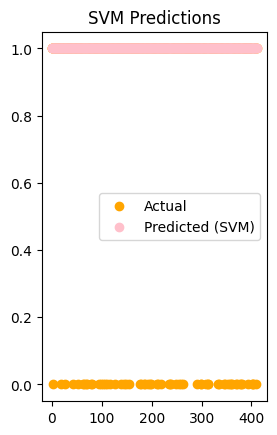

In [31]:
# Plotting SVM predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='orange')
plt.scatter(range(len(svm_predictions)), svm_predictions, label='Predicted (SVM)', color='pink')
plt.title('SVM Predictions')
plt.legend()
plt.show()

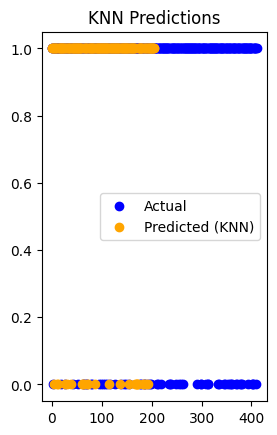

In [32]:
# Plotting KNN predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(knn_predictions)), knn_predictions, label='Predicted (KNN)', color='orange')
plt.title('KNN Predictions')
plt.legend()
plt.show()

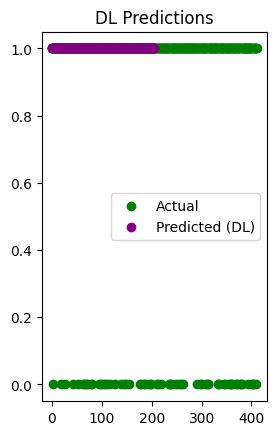

In [33]:
# Plotting DL predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='green')
plt.scatter(range(len(dl_predictions)), dl_predictions, label='Predicted (DL)', color='purple')
plt.title('DL Predictions')
plt.legend()
plt.show()